In [1]:
# Downloading data from kaggle to colab, after uploading my API token from kaggle account
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# Export the files from zip format
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## Data Augmentation

In [1]:
from tensorflow import keras

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training data
train_gen = ImageDataGenerator(
    rescale = 1/225,
    rotation_range = 3,
    width_shift_range = 0.15,
    height_shift_range = 0.13,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_data = train_gen.flow_from_directory(
    '/content/train',
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)

print(train_data.class_indices)

Found 20000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}


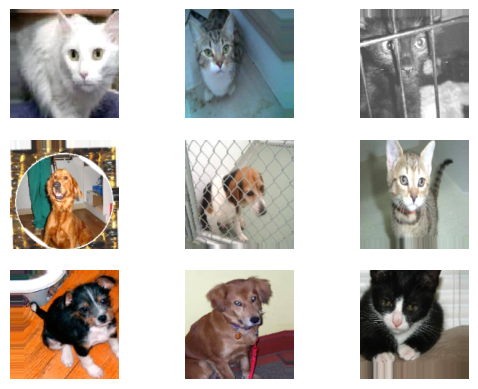

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x_batch, y_batch = next(train_data)

for i in range(9):  # show 9 augmented images
    plt.subplot(3, 3, i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')

plt.show()

In [4]:
# Testing data
test_gen = ImageDataGenerator(
    rescale = 1/225
)

test_data = test_gen.flow_from_directory(
    '/content/test',
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)

print(test_data.class_indices)

Found 5000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}


## CNN model architecture

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, GlobalAveragePooling2D

In [6]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(GlobalAveragePooling2D())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,601 (146.88 KB)

 Trainable params: 37,345 (145.88 KB)

 Non-trainable params: 256 (1.00 KB)

In [7]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    restore_best_weights = True
)

In [8]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(train_data, epochs = 20, validation_data = test_data, callbacks = [early_stop])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 215ms/step - accuracy: 0.6047 - loss: 0.6612 - val_accuracy: 0.5546 - val_loss: 0.8150
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 208ms/step - accuracy: 0.7007 - loss: 0.5823 - val_accuracy: 0.6714 - val_loss: 0.6066
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 208ms/step - accuracy: 0.7207 - loss: 0.5519 - val_accuracy: 0.6346 - val_loss: 0.7179
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 206ms/step - accuracy: 0.7435 - loss: 0.5212 - val_accuracy: 0.7630 - val_loss: 0.4916
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - accuracy: 0.7752 - loss: 0.4720 - val_accuracy: 0.7654 - val_loss: 0.5038
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 214ms/step - accuracy: 0.8059 - loss: 0.4355 - val_accuracy: 0.7756 - val_loss: 0.4933
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 215ms/step - accuracy: 0.8268 - loss: 0.3905 - val_accuracy: 0.7790 - val_loss: 0.4761
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - accuracy: 0.8388 -

### Early Stopping — Step-by-Step Read

- Up to **epoch 9** → both training and validation accuracy/loss were improving steadily.
- At **epoch 10** → train accuracy was still going up, but validation accuracy started to dip (classic overfitting sign).
- By **epochs 11–14** → `val_loss` jumped badly (0.8017, 0.7927), but since `patience = 3`, training didn’t stop immediately—it waited a few more epochs.
- At **epoch 12** → validation loss actually improved again (**0.3171**, which is the best so far 🚀).
- By **epochs 13–15** → validation loss got worse again → so after 3 epochs without improvement, **early stopping** stopped training at **epoch 15** and restored the best weights (from **epoch 12**).

**Final model (epoch 12):**
- Train accuracy: ~**87.5%**
- Validation accuracy: ~**85.4%**
- Validation loss: **0.3171** *(best)*


## Model Evaluation

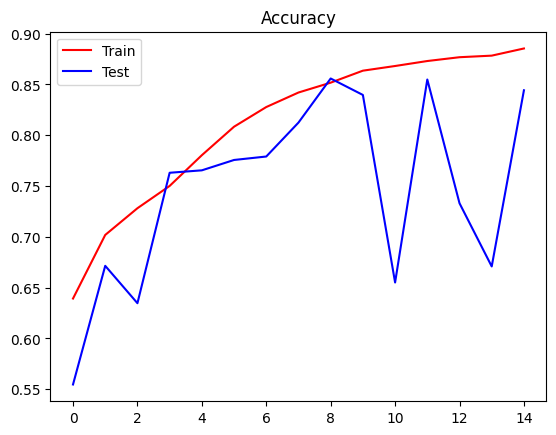

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'Train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'Test')
plt.title('Accuracy')
plt.legend()
plt.show()

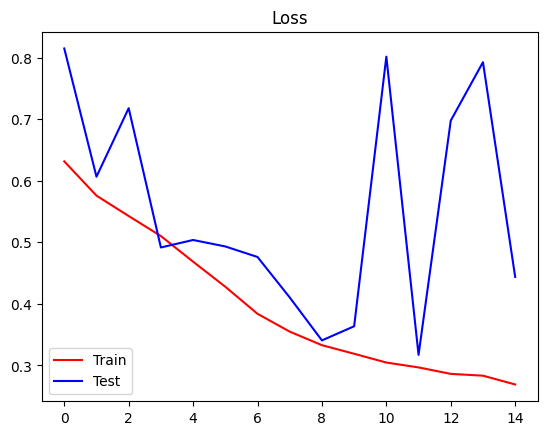

In [10]:
plt.plot(history.history['loss'], color = 'red', label = 'Train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'Test')
plt.title('Loss')
plt.legend()
plt.show()

## Model Predication

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
Prediction: Cat 🐱
Raw Probability: 0.039986707


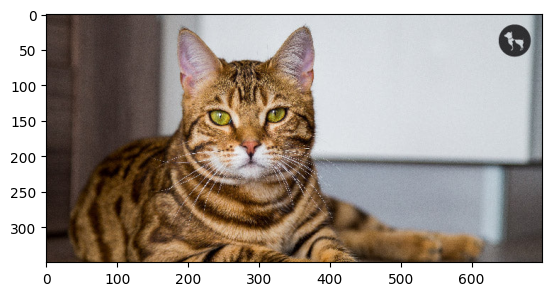

In [11]:
import cv2
import numpy as np

# Read image
img = cv2.imread("Bengal_Cat.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

# Resize to model input size
img = cv2.resize(img, (150, 150))

# Normalize
img = img / 255.0

# Reshape to add batch dimension
img = np.reshape(img, (1, 150, 150, 3))

# Prediction
res = model.predict(img)

if res[0][0] >= 0.5:
    print("Prediction: Dog 🐶")
else:
    print("Prediction: Cat 🐱")

# To see raw probability
print("Raw Probability:", res[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: Dog 🐶
Raw Probability: 0.9748351


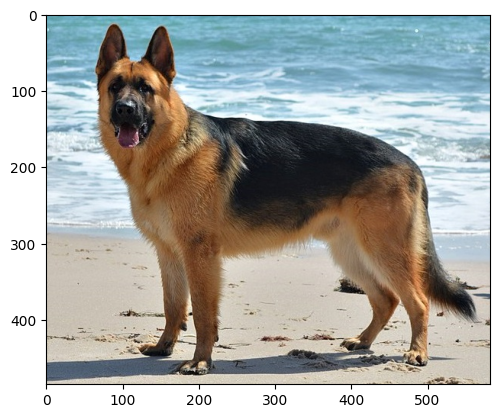

In [12]:
# Read image
img = cv2.imread("dog.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

# Resize to model input size
img = cv2.resize(img, (150, 150))

# Normalize
img = img / 255.0

# Reshape to add batch dimension
img = np.reshape(img, (1, 150, 150, 3))

# Prediction
res = model.predict(img)

if res[0][0] >= 0.5:
    print("Prediction: Dog 🐶")
else:
    print("Prediction: Cat 🐱")

# To see raw probability
print("Raw Probability:", res[0][0])

In [15]:
# Saving the whole model (architecture + weights + optimizer state)
model.save("my_model.keras")

from google.colab import files
files.download("my_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>